In [81]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [82]:
# File path to listings.csv
listings_csv_path = "Data Files for AirBnB Project/listings.csv"

#read listings.csv into a database
listings_df = pd.read_csv(listings_csv_path)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,NaN,"Shaw, Logan Circle",38.910461,-77.019331,Entire home/apt,433,2,155,2019-01-26,1.27,5,300
1,3662,Vita's Hideaway II,4645,Vita,NaN,Historic Anacostia,38.861925,-76.989634,Private room,65,2,35,2018-06-02,0.37,3,340
2,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.863138,-76.988362,Private room,55,2,68,2018-10-27,0.67,3,296
3,3771,Mt. Pleasant,4795,Charlene,NaN,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.927605,-77.039265,Private room,88,1,1,2009-01-21,0.01,1,0
4,4002,2 Bedroom Private Condo Suite (Basement Apt),5143,Anthony,NaN,"North Michigan Park, Michigan Park, University...",38.940084,-76.989360,Entire home/apt,120,2,149,2018-11-13,1.22,1,316


In [83]:
print(f"listings.csv has {len(listings_df)} rows")

listings.csv has 9001 rows


In [84]:
###  delete rows with o days availability  ###
#save the length of listings.csv
listing_ln_prior = len(listings_df)
#delete rows that have 0 annual avalability
listings_df = listings_df[listings_df.availability_365 != 0]
#save the length of listings after deleting entries with 0 availability
listing_ln_post = len(listings_df)
#find how many properties were deleted and print result
avail_listings = listing_ln_prior - listing_ln_post
print(f"{avail_listings} were removed for having 0 availability")
print(f"{listing_ln_post} properties remain")

2574 were removed for having 0 availability
6427 properties remain


In [85]:
###  check if each d is a unique property ###
#find the number of unique id's in the id column
id_cnt = listings_df.id.nunique()
#compare the number of unique id's to the total number of properite in listings
if id_cnt == listing_ln_post:
    print("id's are unique")
else:
    print("id's are not unique")

id's are unique


In [86]:
###  drop unecessary columns  ###
del listings_df["name"]
del listings_df['host_id']
del listings_df['host_name']
del listings_df['neighbourhood_group']
listings_df.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3362,"Shaw, Logan Circle",38.910461,-77.019331,Entire home/apt,433,2,155,2019-01-26,1.27,5,300
1,3662,Historic Anacostia,38.861925,-76.989634,Private room,65,2,35,2018-06-02,0.37,3,340
2,3686,Historic Anacostia,38.863138,-76.988362,Private room,55,2,68,2018-10-27,0.67,3,296
4,4002,"North Michigan Park, Michigan Park, University...",38.940084,-76.989360,Entire home/apt,120,2,149,2018-11-13,1.22,1,316
5,4197,"Capitol Hill, Lincoln Park",38.887906,-76.996678,Private room,83,4,37,2018-09-30,0.31,2,95


In [87]:
###  find the number of properties in each neighborhood  ###
#group by neighborhood and find the number of properties and average price for each neighborhood 
loc_dfg = listings_df.groupby("neighbourhood").agg({"id":"count", "price":"mean"})
#remane columns in groupby
loc_dfg.rename(columns={'id': 'number of properties', 'price':'average price'}, inplace=True)
loc_dfg

,number of properties,average price
neighbourhood,,
"Brightwood Park, Crestwood, Petworth",349,142.432665
"Brookland, Brentwood, Langdon",109,109.807339
"Capitol Hill, Lincoln Park",625,220.713600
"Capitol View, Marshall Heights, Benning Heights",53,98.169811
"Cathedral Heights, McLean Gardens, Glover Park",58,230.103448
"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",77,227.597403
"Colonial Village, Shepherd Park, North Portal Estates",29,130.862069
"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",576,139.647569
"Congress Heights, Bellevue, Washington Highlands",65,161.938462


[30.0, 4.0]


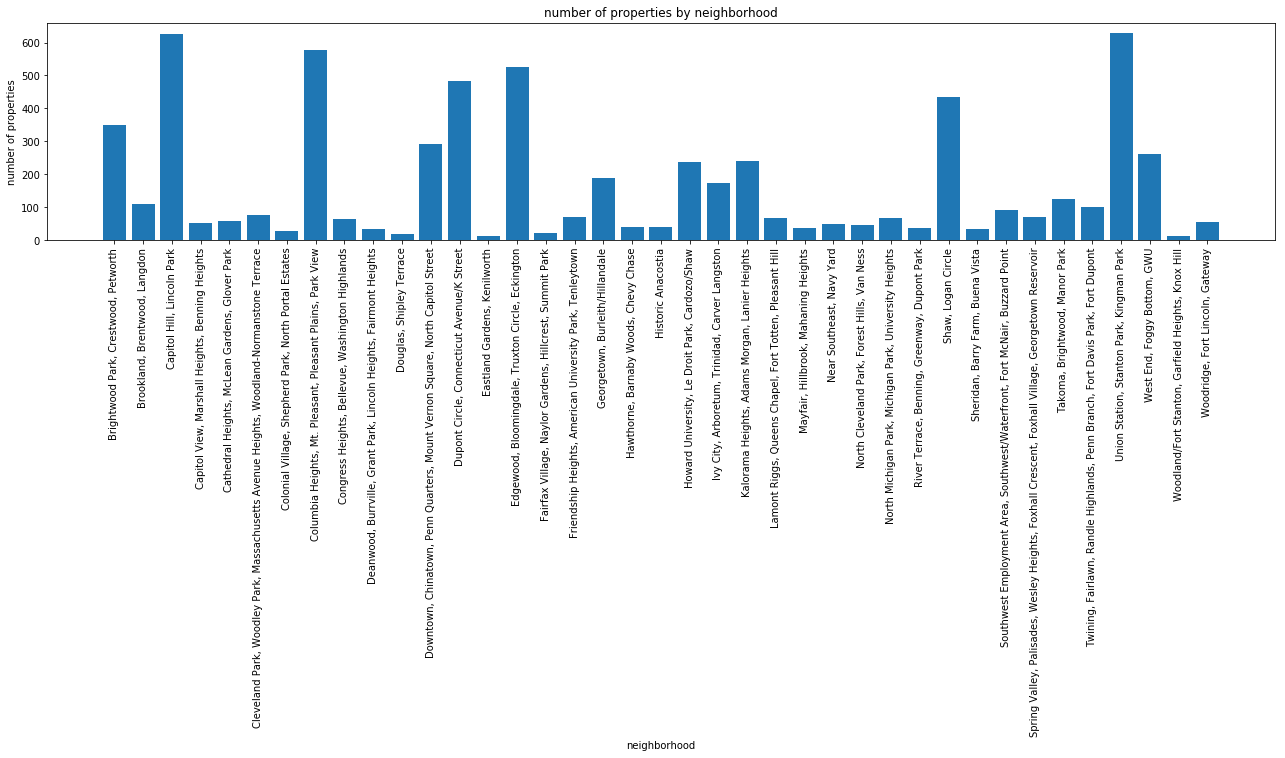

In [90]:
plt.bar(loc_dfg.index, loc_dfg["number of properties"])
plt.ylabel('number of properties')
plt.xlabel('neighborhood')
plt.title('number of properties by neighborhood')

plt.xticks(rotation='vertical')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 

#increase plot size horizontally by 4
#fig_size[0] = 12
fig_size[0] = fig_size[0] + 8
plt.rcParams["figure.figsize"] = fig_size
# Pri
print(fig_size)